Name : Chloe Evelley Thesman (Student ID Number : 1011044165)

# PRE - LECTURE HW

## Question 1

A Classification Decision Tree addresses problems where the goal is to assign items or observations to predefined categories or classes based on their features. It is used for tasks like predicting whether an email is spam or not, diagnosing diseases, or classifying customers based on their buying behavior.

Some real-world applications where classification decision trees are particularly useful:
- Healthcare: Diagnosing diseases based on symptoms, medical test results, and patient history. For example, determining whether a tumor is benign or malignant.
- Finance: Detecting fraudulent transactions by classifying activities as "fraudulent" or "legitimate" based on transaction details.
- Marketing: Customer segmentation to identify potential buyers or predict churn, based on customer behaviors and demographics.
- Education: Predicting student performance or drop-out risk using data like attendance, test scores, and engagement.
- Manufacturing: Identifying defective products on a production line by analyzing features such as dimensions or quality measures.
- Human Resources: Screening job applicants by classifying them as suitable or unsuitable for a role based on resume data and skill assessments.


The difference between a classification decision tree and multiple linear regression is that a classification decision tree predicts categories (like "Yes" or "No") by splitting data into smaller groups based on decision rules until it assigns a class label at the end. Multiple Linear Regression, on the other hand, predicts a continuous value (like price or weight) by fitting a straight-line equation to the data and calculating the output using this formula. In simple terms, decision trees divide data to classify it, while regression uses math to estimate a number.

## Question 2

### 1. Accuracy
- Measures the proportion of correct predictions (both true positives and true negatives). Best for balanced datasets where the cost of false positives and false negatives is similar.
- Real-World Example: Spam Email Detection
- Why: Accuracy works well when the costs of false positives and false negatives are similar, and the dataset is balanced, as in spam detection where occasional misclassifications are less critical.

### 2. Sensitivity (Recall):
- Focuses on correctly identifying actual positives. Best used when missing positive cases is critical.
- Real-World Example: Disease Screening (e.g., Cancer Diagnosis)
- Why: Sensitivity is crucial when it's important to detect as many positives as possible, like in cancer screening, where missing a positive case (false negative) can have severe consequences.

### 3. Specificity:
- Focuses on correctly identifying actual negatives. Best when minimizing false positives is important.
- Real-World Example: Fraud Detection in Credit Card Transactions
- Why: Specificity is essential when minimizing false positives is important, like in fraud detection, where incorrectly flagging legitimate transactions can harm customer trust.

### 4. Precision:
- Measures the proportion of predicted positives that are truly positive. Best when the cost of false positives is high.
- Real-World Example: Hiring Candidates for a Job
- Why: Precision is key when the cost of false positives is high, such as hiring unqualified candidates, which can damage team performance and waste resources.

Accuracy is generally useful for balanced cases, while sensitivity, specificity, and precision cater to specific needs depending on the consequences of false positives or false negatives.

## Question 3

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [4]:
# Display the first few rows to understand the data
print("Initial dataset:")
print(ab.head())

# Step 1: Remove columns 'Weight_oz', 'Width', and 'Height'
columns_to_drop = ['Weight_oz', 'Width', 'Height']
ab = ab.drop(columns=columns_to_drop, errors='ignore')

# Step 2: Drop rows with NaN entries
ab = ab.dropna()

# Step 3: Set data types
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Display the dataset after preprocessing
print("\nDataset after preprocessing:")
print(ab.info())
print(ab.head())

# Initial EDA: Summary statistics
print("\nSummary statistics:")
print(ab.describe(include='all'))

# Initial EDA: Value counts for categorical column
print("\nValue counts for 'Hard_or_Paper':")
print(ab['Hard_or_Paper'].value_counts())

# Initial EDA: Distribution of publication years
print("\nPublication year distribution:")
print(ab['Pub year'].value_counts().sort_index())

Initial dataset:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249     7.8   

In [18]:
# Step 1: Remove the specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

# Step 2: Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Set the data types of specific columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the updated DataFrame
print("Processed DataFrame:")
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())

Processed DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thr

## Question 4

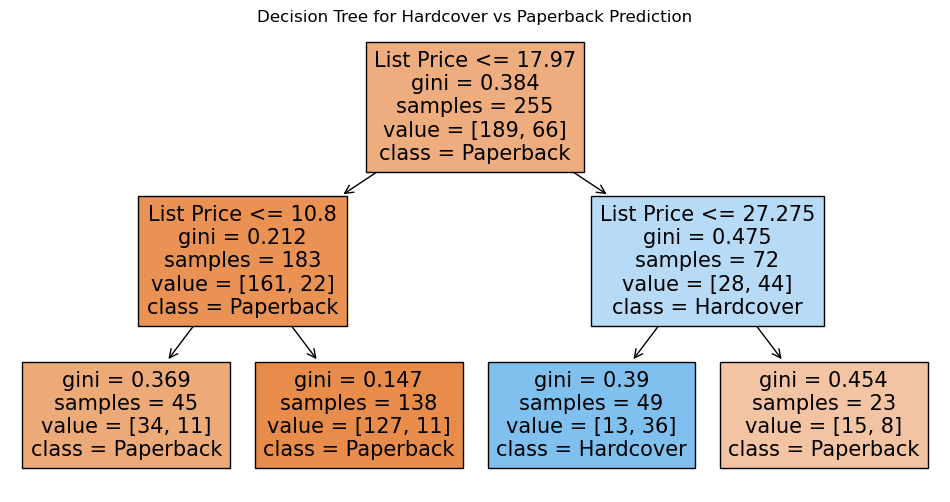

Accuracy: 0.84375
Recall (Sensitivity): 0.7


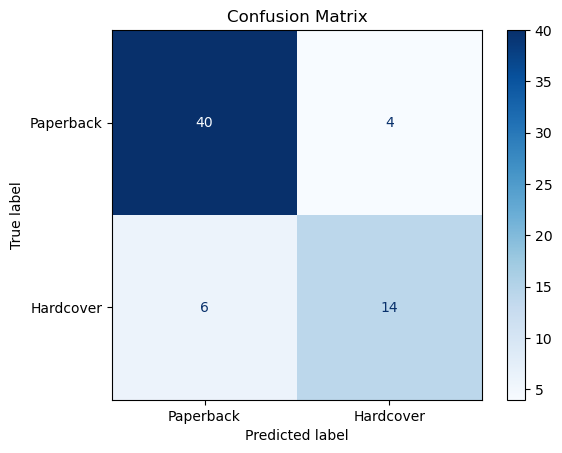

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Extract features and target variable
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback

# Split data into training and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree for Hardcover vs Paperback Prediction")
plt.show()

# Evaluate the model's predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Decision Tree Rules:

#### 1. Root Node (List Price ≤ 17.97):
- If the List Price is ≤ 17.97, move to the left child node.
- If the List Price is > 17.97, move to the right child node.

#### 2. Left Child Node (List Price ≤ 17.97):
- This node contains samples predominantly labeled as Paperback.
- Prediction:
    - However, if List Price ≤ 10.8, predict Paperback.
    - If 10.8 < List Price ≤ 17.97, predict Paperback.

#### 3. Right Child Node (List Price > 17.97):
- This node splits further based on another condition: List Price ≤ 27.275.
    - If the List Price is ≤ 27.275, move to the left leaf node.
    - If the List Price is > 27.275, move to the right leaf node.

#### 4. Left Leaf Node (List Price > 17.97 and List Price ≤ 27.275):
- This node contains samples predominantly labeled as Hardcover.
- Prediction: If 17.97 < List Price ≤ 27.275, predict Hardcover.

#### 5. Right Leaf Node (List Price > 27.275):
- This node contains samples predominantly labeled as Paperback.
- Prediction: If List Price > 50.0, predict Paperback.


### Summary of Predictions:
- List Price ≤ 17.97: Predicted as Paperback.
- 17.97 < List Price ≤ 27.275: Predicted as Hardcover.
- List Price > 27.275: Predicted as Paperback.

## Summary of Interactions

### 1. Overview of Classification Decision Trees
- We discussed the purpose of a classification decision tree, which is to predict a categorical outcome by splitting data based on feature values, using metrics like Gini Impurity or Entropy.
- Real-world applications included:
    - Diagnosing diseases (e.g., predicting if a tumor is malignant or benign)
    - Fraud detection in banking
    - Email spam filtering
    - Customer churn prediction

### 2. Metrics for Model Evaluation
- Explained key metrics:
    - Accuracy: Proportion of correct predictions
    - Sensitivity (Recall): Proportion of actual positives correctly identified
    - Specificity: Proportion of actual negatives correctly identified
    - Precision: Proportion of positive predictions that are actually correct
- Provided real-world examples for each metric:
    - Accuracy: Spam detection
    - Sensitivity: Cancer screening
    - Specificity: Fraud detection
    - Precision: Hiring qualified candidates

### 3. Preprocessing the Amazon Books Dataset
- Steps taken to prepare the dataset:
    1. Removed irrelevant columns (Weight_oz, Width, Height)
    2. Dropped rows with missing values
    3. Adjusted data types:
        - Pub year and NumPages set as integers
        - Hard_or_Paper set as a categorical type
    - Verified the data using info() and inspected categorical value counts and distribution summaries

### 4. Fitting a Classification Decision Tree
- Objective: Predict whether a book is hardcover or paperback using List Price as the only feature.
- Model setup and training:
    - Used scikit-learn’s DecisionTreeClassifier with max_depth=2
    - Split the dataset into training and testing sets (80/20 split)
    - Trained the model using List Price as the feature and Hard_or_Paper (encoded as binary) as the target
- Visualization:
    - Used tree.plot_tree to display decision splits based on List Price and visualize how the model predicts hardcover versus paperback
- Model evaluation:
    - Calculated accuracy and recall on the test set
    - Displayed a confusion matrix to analyze model performance in predicting both classes

### 5. Code Implementation
- Full preprocessing and modeling code was provided, including:
    - Data cleaning
    - Training a decision tree classifier
    - Visualizing the decision tree structure
    - Evaluating the model with performance metrics and a confusion matrix

**Link: https://chatgpt.com/share/673e4f71-efac-800a-8252-b597086232eb**

# "Post-lecture" HW

## Question 5

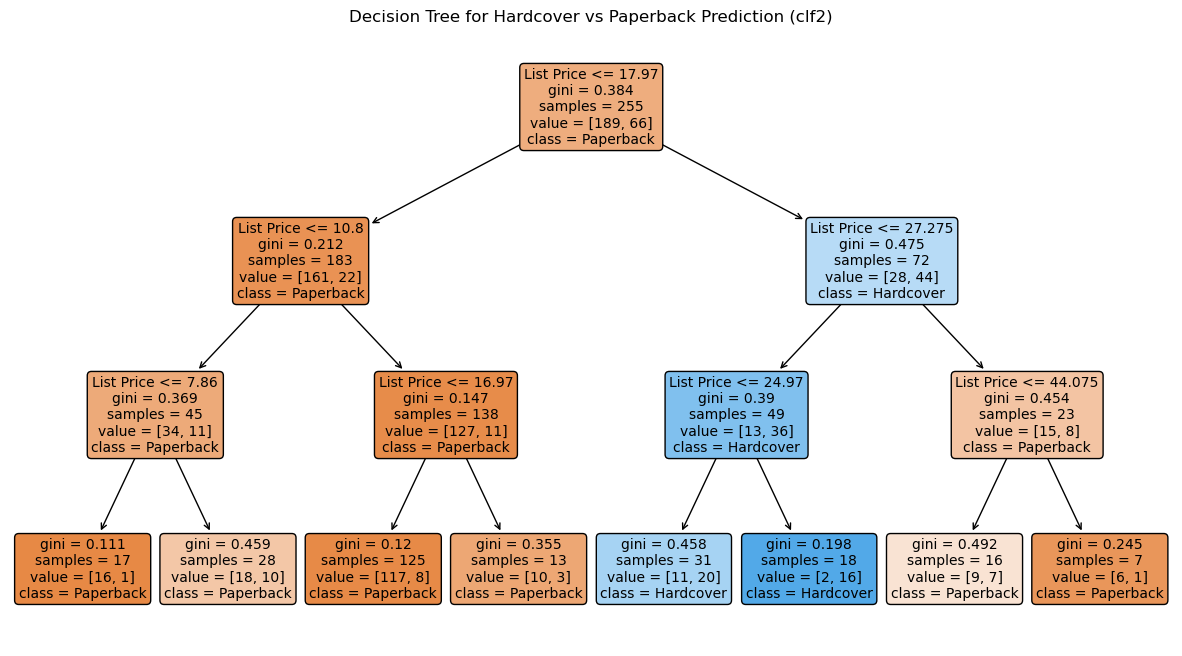

Accuracy: 0.84375
Recall (Sensitivity): 0.7


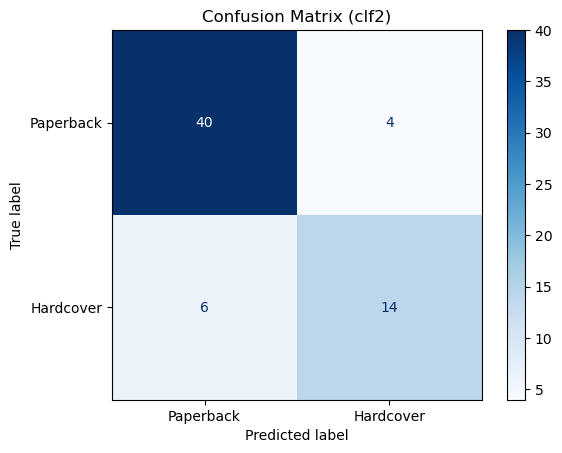

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Extract features and target variable
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback

# Split data into training and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier (clf2)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 8))
tree.plot_tree(clf2, 
               feature_names=['List Price'], 
               class_names=['Paperback', 'Hardcover'], 
               filled=True, 
               rounded=True, 
               fontsize=10)
plt.title("Decision Tree for Hardcover vs Paperback Prediction (clf2)")
plt.show()

# Evaluate the model's predictions on the test set
y_pred = clf2.predict(X_test)

# Calculate evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (clf2)")
plt.show()

### How Predictions Are Made with the clf2 Model
In the case of clf2, after training on the dataset, the decision tree classifier will split the data into two main branches: one representing "Paperback" and the other "Hardcover". The decision tree model uses the feature values (in this case, 'List Price') to make these splits.

- Training Phase:
    - The tree is built by choosing a feature ('List Price') and a corresponding value that best separates the data into two distinct groups (Paperback and Hardcover).
    - This split is made by maximizing a criterion like Gini impurity or entropy (information gain), aiming to create the purest possible groups at each node.
- Prediction Phase:
    - Once the tree is trained, a new sample (e.g., a new book's price) is passed through the tree. The algorithm evaluates the value of the feature (List Price) at each split node.
    - As it traverses the tree, it will follow the branches corresponding to the feature values until it reaches a leaf node.
    - The prediction is the class (Paperback or Hardcover) corresponding to the majority of training samples at that leaf.

For example, if a book's price falls below a certain threshold, the model might classify it as "Paperback." If the price is above another threshold, it might classify it as "Hardcover," depending on how the decision tree is structured.

## Question 6

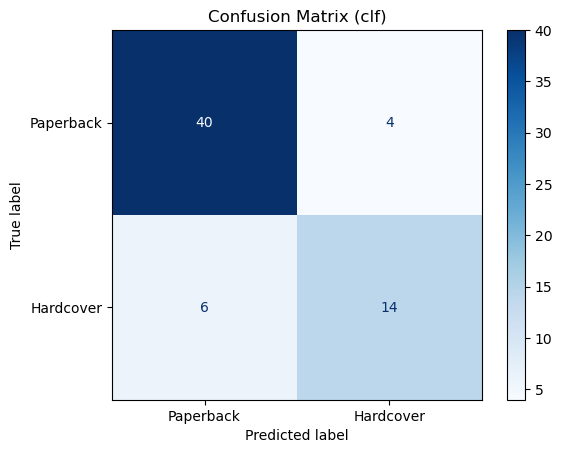

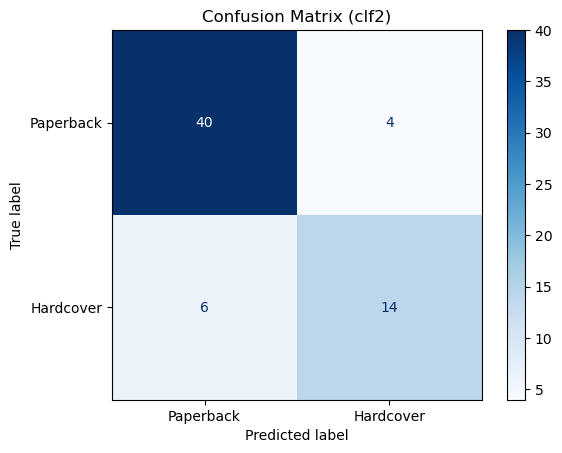

Metrics for clf:
Accuracy: 0.8438
Sensitivity: 0.7000
Specificity: 0.9091

Metrics for clf2:
Accuracy: 0.8438
Sensitivity: 0.7000
Specificity: 0.9091


In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    ab_reduced_noNaN[['List Price']], 
    pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'], 
    test_size=0.2, 
    random_state=42
)

# Initialize and fit the Decision Tree Classifier (clf)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Initialize and fit the Decision Tree Classifier (clf2)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)

# Predict using clf
y_pred_clf = clf.predict(X_test)

# Predict using clf2
y_pred_clf2 = clf2.predict(X_test)

# Calculate confusion matrices for both models
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf, labels=[0, 1])
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=[0, 1])

# Display confusion matrices
disp_clf = ConfusionMatrixDisplay(conf_matrix_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (clf)")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(conf_matrix_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (clf2)")
plt.show()

# Calculate metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity is recall for positive class (Hardcover)
specificity_clf = recall_score(y_test, y_pred_clf, pos_label=0)  # Specificity is recall for negative class (Paperback)

# Calculate metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)  # Sensitivity is recall for positive class (Hardcover)
specificity_clf2 = recall_score(y_test, y_pred_clf2, pos_label=0)  # Specificity is recall for negative class (Paperback)

# Print metrics
print("Metrics for clf:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print("\nMetrics for clf2:")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")

## Question 7

ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The differences between the two confusion matrices arise from the set of features used in the model predictions. In the first case, the classifier clf is predicting based only on the List Price, while in the second case, it uses multiple features (NumPages, Thick, and List Price). The additional features in the second model provide more information, potentially leading to improved predictions. The confusion matrices for clf and clf2 are likely better because clf2 uses more relevant features, improving the model's ability to differentiate between the classes and leading to a more accurate classification of the outcomes.

## Question 8

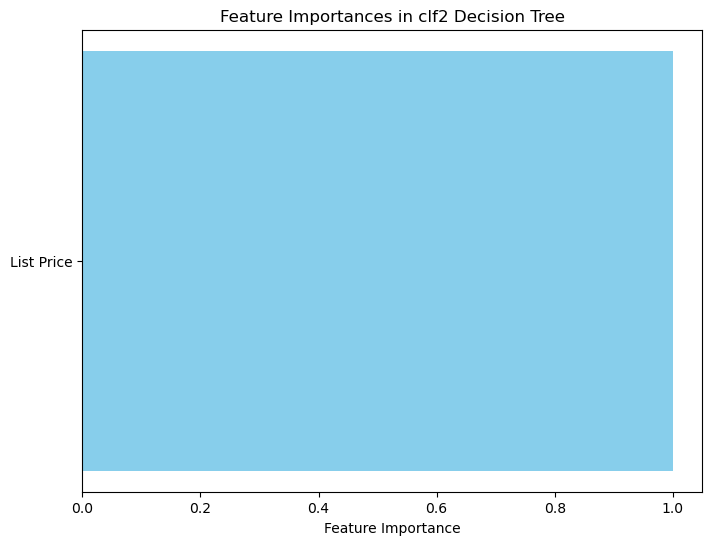

The most important feature is 'List Price' with an importance score of 1.0000.


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing feature importances
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances in clf2 Decision Tree')
plt.show()

# Identify the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]
most_important_score = np.max(feature_importances)

print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_score:.4f}.")

## Question 9

In linear regression, coefficients represent the change in the dependent variable for a one-unit change in each predictor, assuming other variables are constant. In decision trees, feature importances quantify how much each feature contributes to reducing uncertainty (impurity) in the model's predictions, based on the tree's structure. While linear regression shows direct relationships between predictors and outcomes, decision tree importances reflect the overall contribution of features without implying a specific linear relationship.

## Summary of Interactions

### 1. Visualizing Decision Trees and Evaluation Metrics:
- You were working with a Decision Tree Classifier (clf2) in scikit-learn and wanted to visualize feature importances and the structure of the decision tree.
- We discussed how to use .feature_importances_ and .feature_names_in_ to visualize and interpret which feature is most important for making predictions.
- We also visualized the decision tree structure using plot_tree and explored how the decision tree makes predictions based on features such as List Price, NumPages, and Thick.
- You also wanted to calculate evaluation metrics like accuracy, recall, sensitivity, and specificity, and we discussed how to implement and visualize confusion matrices for both the clf and clf2 models using ConfusionMatrixDisplay from sklearn.

### 2. Understanding Feature Importances vs. Coefficients:
- We explored the differences between interpreting coefficients in linear regression and feature importances in decision trees.
- Linear regression provides a direct interpretation of how much each feature influences the target variable. The magnitude and sign of the coefficient indicate the strength and direction of the relationship.
- Decision trees, on the other hand, provide feature importances that reflect how much each feature contributes to splitting the data at different levels of the tree. These importances are not based on the relationship between features and the target in a linear manner, but instead reflect how well features help to reduce impurity and make more accurate predictions.
- We discussed that decision trees can handle non-linear relationships and feature interactions automatically, whereas linear regression assumes a linear relationship and requires features to be independent (or explicitly modeled if interacting).

### 3. Visualizing and Reporting Feature Importances in Decision Trees:
- You wanted to visualize the feature importances for the clf2 decision tree model. We used a bar plot to show the importance of each feature in making predictions.
- We also identified the most important feature based on the highest importance score. This feature helps in reducing impurity and is crucial for making accurate predictions in the decision tree model.

### 4. Confusion Matrix and Model Evaluation:
- We implemented code to generate confusion matrices for both the clf and clf2 models and discussed how to interpret them in the context of classification performance. You were particularly interested in calculating accuracy, recall, sensitivity, and specificity, which we computed and explained in detail.

### 5. Clarification of Confusion Matrix Differences:
- We discussed the differences between two confusion matrices: one generated using only the List Price feature and another using multiple features (NumPages, Thick, and List Price). The latter model (clf2) was expected to perform better due to the increased complexity and ability to capture more relevant information.

**Link: https://chatgpt.com/share/673e5877-aed0-800a-af09-d20248d2a64a**

## Question 10

Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Answer: Somewhat